# Final Project Katherine Maki - BIOF 309

## A Description of Unique and Shared Bacterial Features from Three Common Taxonomy Databases

## Project Questions: How many bacterial features (at the genus level) are unique and overlapping across three major taxonomy databases? Are certain datasets more biased to include genera from a specific phylum?

### What is a bacterial genus?

Bacteria is classified taxonomically ranging from Phylum (high level) to species strain

![taxonomy](img/Taxonomy_copy2.png)

In microbiome analysis, 16S rRNA gene amplicon sequencing is a "culture independent" analysis technique used to classify bacteria based on hypervariable regions in the bacterial 16S rRNA gene. Bacteria is classified based on genetic sequences that are amplified from DNA extracted from a sample. For example, to noninvasively analyze the gut microbiome you can collect and extract DNA from fecal samples :)

## Three Databases that will be analyzed
#### Greengenes
![RDP](img/greengenes.png)
#### Silva 
![RDP](img/silva.png)
#### Human Oral Microbiome Database
![RDP](img/homd.png)

## Links to data
[Human Oral Microbiome Database](http://www.homd.org/?name=Download&taxonly=1)
[Silva Release 138](https://www.arb-silva.de/no_cache/download/archive/release_138/Exports/)
[Greengenes 13_8](https://docs.qiime2.org/2020.2/data-resources/)

## Data Import

In [1]:
import pandas as pd
import numpy as np

## Since there are four datasets and they are all formatted differently, we will bring them in seperately and format them to extra characters are deleted, empty columns are changed to "NaN" and the genus data is subsetted

### Greengenes is imported first

In [2]:
#Import GreenGenes Dataset without header
gg = pd.read_table('data_input/gg_99_otu_taxonomy.txt', header=None, names=['id', 'taxonomy'])

In [3]:
#Split Single Taxonomy Column into Several Columns
gg = gg.taxonomy.str.split(";",expand=True)
gg.columns = ['Kingdom','Phylum','Class',
                     'Order','Family','Genus', 'Species']

In [4]:
#Get rid of the preceding type labels 
gg.Kingdom = gg.Kingdom.apply(lambda x: x.replace('k__',''))
gg.Phylum = gg.Phylum.apply(lambda x: x.replace('p__',''))
gg.Class = gg.Class.apply(lambda x: x.replace('c__',''))
gg.Order = gg.Order.apply(lambda x: x.replace('o__',''))
gg.Family = gg.Family.apply(lambda x: x.replace('f__',''))
gg.Genus = gg.Genus.apply(lambda x: x.replace('g__',''))
gg.Species = gg.Species.apply(lambda x: x.replace('s__',''))

In [5]:
#Replace blank spaces with "Not Classified" so all databases match
gg = gg.replace(r'^\s*$', "Not Classified", regex=True)

In [6]:
#Add column identifying the dataset
gg['Dataset'] = 'Greengenes'

In [7]:
#View output
gg.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Dataset
0,Bacteria,Cyanobacteria,Synechococcophycideae,Synechococcales,Synechococcaceae,Synechococcus,Not Classified,Greengenes
1,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,Pelagibacteraceae,Not Classified,Not Classified,Greengenes
2,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Mycobacteriaceae,Mycobacterium,Not Classified,Greengenes
3,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Not Classified,Greengenes
4,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Anoxybacillus,kestanbolensis,Greengenes


In [8]:
#Pull out Phylum, Genus and Dataset Variables
gg_ss =  gg[['Phylum','Genus', 'Dataset']]

In [9]:
#Remove whitespace (Some phyla were being double counted because there was whitespace before and after names)
gg_ss.Phylum = gg_ss.Phylum.apply(lambda x: x.replace(' ',''))
gg_ss.Genus = gg_ss.Genus.apply(lambda x: x.replace(' ',''))

/Users/katherineadurham/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
gg_ss.head()

,Phylum,Genus,Dataset
0,Cyanobacteria,Synechococcus,Greengenes
1,Proteobacteria,NotClassified,Greengenes
2,Actinobacteria,Mycobacterium,Greengenes
3,Firmicutes,Staphylococcus,Greengenes
4,Firmicutes,Anoxybacillus,Greengenes


In [12]:
#Identify unique bacterial taxa at the genus level in GreenGenes Dataset
unique_gg = gg_ss.drop_duplicates(subset= "Genus")
#Stratify these taxa by higher-order phylum level to see which Phlya have the most unique genera 
gg_groupby_phylum = unique_gg.groupby("Phylum")["Genus"]
gg_groupby_phylum.count().sort_values(ascending=False).head(20)

Phylum
Proteobacteria     880
Firmicutes         292
Actinobacteria     239
Bacteroidetes      216
Cyanobacteria       89
Euryarchaeota       86
Crenarchaeota       27
Chloroflexi         26
Verrucomicrobia     24
Planctomycetes      17
Synergistetes       16
Spirochaetes        16
Acidobacteria       15
Aquificae           13
[Thermi]            12
Nitrospirae         12
Thermotogae         11
Tenericutes         11
Chlamydiae          11
Fusobacteria         9
Name: Genus, dtype: int64

### Next Silva is imported

In [13]:
#Import Silva Dataset without header
silva = pd.read_table('data_input/silva_taxonomy_7_levels.txt', header=None, names=['id', 'taxonomy'])

In [14]:
silva = silva.taxonomy.str.split(";",expand=True)
silva.columns = ['Kingdom','Phylum','Class',
                     'Order','Family','Genus', 'Species']

In [15]:
#Get rid of the preceding type labels 
silva.Kingdom = silva.Kingdom.apply(lambda x: x.replace('D_0__',''))
silva.Phylum = silva.Phylum.apply(lambda x: x.replace('D_1__',''))
silva.Class = silva.Class.apply(lambda x: x.replace('D_2__',''))
silva.Order = silva.Order.apply(lambda x: x.replace('D_3__',''))
silva.Family = silva.Family.apply(lambda x: x.replace('D_4__',''))
silva.Genus = silva.Genus.apply(lambda x: x.replace('D_5__',''))
silva.Species = silva.Species.apply(lambda x: x.replace('D_6__',''))

In [16]:
#Add column identifying the dataset
silva['Dataset'] = 'Silva'

In [17]:
#Only keep Bacteria in Silva Dataset as it also contains Archaea
silva_bac = silva[silva['Kingdom'] == 'Bacteria']
silva_bac.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Dataset
0,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Klebsiella,uncultured organism,Silva
1,Bacteria,Patescibacteria,Parcubacteria,GW2011-GWA2-46-7,uncultured bacterium,uncultured bacterium,uncultured bacterium,Silva
2,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Tyzzerella 3,uncultured Firmicutes bacterium,Silva
3,Bacteria,Proteobacteria,Deltaproteobacteria,Oligoflexales,Oligoflexaceae,uncultured,uncultured bacterium,Silva
4,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,Pseudoalteromonas,Pseudoalteromonas sp.,Silva


In [18]:
#Pull out Phylum, Genus and Dataset Variables
silva_ss =  silva_bac[['Phylum', 'Genus', 'Dataset']]

In [19]:
#Remove whitespace (Some phyla were being double counted because there was whitespace before and after names)
silva_ss.Phylum = silva_ss.Phylum.apply(lambda x: x.replace(' ',''))
silva_ss.Genus = silva_ss.Genus.apply(lambda x: x.replace(' ',''))

In [20]:
silva_ss.head()

,Phylum,Genus,Dataset
0,Proteobacteria,Klebsiella,Silva
1,Patescibacteria,unculturedbacterium,Silva
2,Firmicutes,Tyzzerella3,Silva
3,Proteobacteria,uncultured,Silva
4,Proteobacteria,Pseudoalteromonas,Silva


In [21]:
#Need to Change the Different Uncultured Bacteria Data in Silva to "Not Classified" to Match with GreenGenes
#Since there are multiple ways Silva writes uncultured (i.e. uncultured bacterium, uncultured organism) need 
    #search for uncultured and replace
silva_ss.loc[silva_ss['Genus'].str.contains('uncultured'), 'Genus'] = 'Not Classified'

/Users/katherineadurham/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/katherineadurham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
silva_ss.head()

,Phylum,Genus,Dataset
0,Proteobacteria,Klebsiella,Silva
1,Patescibacteria,Not Classified,Silva
2,Firmicutes,Tyzzerella3,Silva
3,Proteobacteria,Not Classified,Silva
4,Proteobacteria,Pseudoalteromonas,Silva


In [23]:
silva_ss['Genus'] = silva_ss.loc[:,'Genus'].str.title() 

/Users/katherineadurham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
silva_ss.head()

,Phylum,Genus,Dataset
0,Proteobacteria,Klebsiella,Silva
1,Patescibacteria,Not Classified,Silva
2,Firmicutes,Tyzzerella3,Silva
3,Proteobacteria,Not Classified,Silva
4,Proteobacteria,Pseudoalteromonas,Silva


In [25]:
#Identify unique bacterial taxa at the genus level in Silva Dataset
unique_silva = silva_ss.drop_duplicates(subset= "Genus")
#Stratify these taxa by higher-order phylum level to see which Phlya have the most unique genera 
silva_groupby_phylum = unique_silva.groupby("Phylum")["Genus"]
silva_groupby_phylum.count().sort_values(ascending=False).head(20)

Phylum
Proteobacteria        2117
Cyanobacteria         1416
Firmicutes             641
Bacteroidetes          524
Actinobacteria         484
Patescibacteria        446
Chloroflexi             87
Planctomycetes          84
Acidobacteria           69
Verrucomicrobia         53
Tenericutes             26
Chlamydiae              26
Spirochaetes            25
Epsilonbacteraeota      20
Lentisphaerae           18
Synergistetes           18
Thermotogae             15
Dependentiae            14
Halanaerobiaeota        14
Aquificae               14
Name: Genus, dtype: int64

### HOMD Database is Imported

In [26]:
#Import HOMD Dataset without header
homd = pd.read_table('data_input/homd_taxonomy_table.txt')

In [27]:
homd.head()

,HMT_ID,Domain,Phylum,Class,Order,Family,Genus,Species,Status,Body_site,...,NCBI_pubmed_count,NCBI_nucleotide_count,NCBI_protein_count,Genome_ID,General_info,Cultivability,Phenotypic_characteristics,Prevalence,Disease,References
0,1,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bartonellaceae,Bartonella,schoenbuchensis,Named,Unassigned,...,9.0,93.0,5894.0,SEQF2664,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Caulobacter,sp. HMT 002,Phylotype,Unassigned,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,echinoides,Named,Unassigned,...,0.0,2.0,0.0,SEQF2933|SEQF3079,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,sp. HMT 004,Phylotype,Unassigned,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,lwoffii,Named,Unassigned,...,NaN,NaN,NaN,SEQF2884,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
homd= homd.loc[:, ['Phylum', 'Genus']]

In [29]:
homd.head()

,Phylum,Genus
0,Proteobacteria,Bartonella
1,Proteobacteria,Caulobacter
2,Proteobacteria,Sphingomonas
3,Proteobacteria,Sphingomonas
4,Proteobacteria,Acinetobacter


In [30]:
#If any uncultured bacteria change to Not Classified
homd.loc[homd['Genus'].str.contains('uncultured'), 'Genus'] = 'Not Classified'

In [31]:
#Add column identifying the dataset
homd['Dataset'] = 'HOMD'

In [32]:
homd.head()

,Phylum,Genus,Dataset
0,Proteobacteria,Bartonella,HOMD
1,Proteobacteria,Caulobacter,HOMD
2,Proteobacteria,Sphingomonas,HOMD
3,Proteobacteria,Sphingomonas,HOMD
4,Proteobacteria,Acinetobacter,HOMD


In [33]:
#Identify unique bacterial taxa at the genus level in HOMD Dataset
unique_homd = homd.drop_duplicates(subset= "Genus")
#Stratify these taxa by higher-order phylum level to see which Phlya have the most unique genera 
homd_groupby_phylum = unique_homd.groupby("Phylum")["Genus"]
homd_groupby_phylum.count().sort_values(ascending=False).head(20)

Phylum
Firmicutes                  77
Proteobacteria              60
Actinobacteria              36
Bacteroidetes               17
Saccharibacteria (TM7)       9
Gracilibacteria (GN02)       4
Synergistetes                3
Fusobacteria                 3
Chloroflexi                  3
Chlorobi                     3
Absconditabacteria (SR1)     3
WPS-2                        1
Spirochaetes                 1
Euryarchaeota                1
Cyanobacteria                1
Chlamydiae                   1
Name: Genus, dtype: int64

### Combine Datasets

In [34]:
df_combined = pd.concat([gg_ss, silva_ss, homd], ignore_index=True)

### Head of combined Dataset

In [35]:
df_combined.head()

,Phylum,Genus,Dataset
0,Cyanobacteria,Synechococcus,Greengenes
1,Proteobacteria,NotClassified,Greengenes
2,Actinobacteria,Mycobacterium,Greengenes
3,Firmicutes,Staphylococcus,Greengenes
4,Firmicutes,Anoxybacillus,Greengenes


In [36]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554693 entries, 0 to 554692
Data columns (total 3 columns):
Phylum     554693 non-null object
Genus      554693 non-null object
Dataset    554693 non-null object
dtypes: object(3)
memory usage: 12.7+ MB


In [37]:
df_combined.dtypes

Phylum     object
Genus      object
Dataset    object
dtype: object

### Demonstrate the shape of your data

In [38]:
df_combined.shape

(554693, 3)

There are 554,692 rows and 3 columns in the merged dataset

### Check for Missing Data

In [39]:
df_combined.isnull().sum()

Phylum     0
Genus      0
Dataset    0
dtype: int64

There is no missing data present in the combined dataset

## Problem Statement 

### What is the number of shared and unique genera across three microbiome databases?

First I will count the number of genera present, stratified by dataset

In [40]:
genera_by_db = df_combined.groupby("Dataset")["Genus"].count()
genera_by_db.head()

Dataset
Greengenes    203452
HOMD             789
Silva         350452
Name: Genus, dtype: int64

There seems to be quite a lot of genera in the greengenes and silva databases, but remember, all genera that were not able to be classified at the genus level were recoded to "Not Classified" and these are still counted in the dataset. Therefore, we will look for the number of unique genera, stratified by dataset to collapse the unclassified genera into one data point

In [41]:
#Dropping duplicate names (combined datasets)
unique_genera_by_dataset = df_combined.drop_duplicates(subset= ["Genus", "Dataset"])

In [42]:
unique_genera_by_dataset["Dataset"].value_counts(sort=True)

Silva         6334
Greengenes    2063
HOMD           223
Name: Dataset, dtype: int64

This shows there are 6,334 unique genera in the Silva dataset, 2,063 unique general in the Greengenes dataset, and 223 unique values in the HOMD dataset. The HOMD dataset is much smaller because it only focuses on bacteria that have been characterized in the oral microbiome, as compared to bacteria across all body sites.

In [43]:
unique_genera_by_dataset["Dataset"].value_counts(normalize=True)

Silva         0.734803
Greengenes    0.239327
HOMD          0.025870
Name: Dataset, dtype: float64

### Are there more unique genera belonging to certain bacteria Phyla across the datasets?

In [44]:
#Identify unique bacterial taxa at the genus level in GreenGenes Dataset
unique_gg = gg_ss.drop_duplicates(subset= "Genus")
#Stratify these taxa by higher-order phylum level to see which Phlya have the most unique genera 
gg_groupby_phylum = unique_gg.groupby("Phylum")["Genus"]
gg_groupby_phylum.count().sort_values(ascending=False).head(20)

Phylum
Proteobacteria     880
Firmicutes         292
Actinobacteria     239
Bacteroidetes      216
Cyanobacteria       89
Euryarchaeota       86
Crenarchaeota       27
Chloroflexi         26
Verrucomicrobia     24
Planctomycetes      17
Synergistetes       16
Spirochaetes        16
Acidobacteria       15
Aquificae           13
[Thermi]            12
Nitrospirae         12
Thermotogae         11
Tenericutes         11
Chlamydiae          11
Fusobacteria         9
Name: Genus, dtype: int64

In [45]:
#Identify unique bacterial taxa at the genus level in Silva Dataset
unique_silva = silva_ss.drop_duplicates(subset= "Genus")
#Stratify these taxa by higher-order phylum level to see which Phlya have the most unique genera 
silva_groupby_phylum = unique_silva.groupby("Phylum")["Genus"]
silva_groupby_phylum.count().sort_values(ascending=False).head(20)

Phylum
Proteobacteria        2117
Cyanobacteria         1416
Firmicutes             641
Bacteroidetes          524
Actinobacteria         484
Patescibacteria        446
Chloroflexi             87
Planctomycetes          84
Acidobacteria           69
Verrucomicrobia         53
Tenericutes             26
Chlamydiae              26
Spirochaetes            25
Epsilonbacteraeota      20
Lentisphaerae           18
Synergistetes           18
Thermotogae             15
Dependentiae            14
Halanaerobiaeota        14
Aquificae               14
Name: Genus, dtype: int64

In [46]:
#Identify unique bacterial taxa at the genus level in HOMD Dataset
unique_homd = homd.drop_duplicates(subset= "Genus")
#Stratify these taxa by higher-order phylum level to see which Phlya have the most unique genera 
homd_groupby_phylum = unique_homd.groupby("Phylum")["Genus"]
homd_groupby_phylum.count().sort_values(ascending=False).head(20)

Phylum
Firmicutes                  77
Proteobacteria              60
Actinobacteria              36
Bacteroidetes               17
Saccharibacteria (TM7)       9
Gracilibacteria (GN02)       4
Synergistetes                3
Fusobacteria                 3
Chloroflexi                  3
Chlorobi                     3
Absconditabacteria (SR1)     3
WPS-2                        1
Spirochaetes                 1
Euryarchaeota                1
Cyanobacteria                1
Chlamydiae                   1
Name: Genus, dtype: int64

## Most Genera per Phyla
### Greengenes
* Proteobacteria 880
* Firmicutes 292
* Actinobacteria 239
* Bacteroidetes 216
* Cyanobacteria 89
* Euryarchaeota 86
* Crenarchaeota 27
* Chloroflexi 26
* Verrucomicrobia 24
* Planctomycetes 17
### Silva
* Proteobacteria 2117
* Cyanobacteria 1416
* Firmicutes 641
* Bacteroidetes 524
* Actinobacteria 484
* Patescibacteria 446
* Chloroflexi 87
* Planctomycetes 84
* Acidobacteria 69
* Verrucomicrobia 53
### HOMD
* Firmicutes 77
* Proteobacteria 60
* Actinobacteria 36
* Bacteroidetes 17
* Saccharibacteria (TM7) 9
* Gracilibacteria (GN02) 4
* Synergistetes 3
* Fusobacteria 3
* Chloroflexi 3
* Chlorobi 3

Proteobacteria and Firmicutes genera were highly represented across all datasets, despite the large difference in number of genera present. There is a big discrepency in the number of Cyanobacteria classified in Silva versus Greengenes which is an interesting observation

## What is the number of unique and shared genera per dataset?

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

To find this I need to make a master list of all of the unique genera, and then create a function that will compare each dataset to the master list and put 1 if the genus is present in that dataset and 0 if the genus is not present in that dataset 

In [48]:
#Make master list of unique genera across all datasets
#Dropping duplicate names (combined datasets)
unique_genera = df_combined.drop_duplicates(subset= ["Genus"])

In [49]:
unique_genera["Genus"].value_counts()

Piscibacillus                         1
Trifoliumsubterraneum                 1
Elusimicrobiabacteriumcg1_02_56_21    1
Scytonemavb-61278                     1
Pyropiakanakaensis                    1
                                     ..
Dehalococcoidiabacteriumdscp2         1
Iheb3-7                               1
Rumenbacteriumys2                     1
Leptospirillum                        1
Fimbriimonas                          1
Name: Genus, Length: 7051, dtype: int64

We have a total of 8,465 unique genera across all datasets

In [50]:
#Extract master list of unique genera and convert to list 
genera_all = unique_genera['Genus']
master_list = genera_all.values.tolist()

In [51]:
print(master_list[0:50])

['Synechococcus', 'NotClassified', 'Mycobacterium', 'Staphylococcus', 'Anoxybacillus', 'Endozoicomonas', 'Bacillus', 'Faecalibacterium', 'Rhizobium', 'Limnobacter', 'Butyrivibrio', 'Hyphomicrobium', 'Shuttleworthia', 'Chroococcidiopsis', 'Pirellula', 'Porphyromonas', 'Leptolyngbya', 'Phormidium', 'Paenibacillus', 'Allobaculum', 'Delftia', 'Blautia', 'Sulfurimonas', 'Dyella', 'Corynebacterium', 'Pseudanabaena', 'Dorea', 'Parabacteroides', 'Spirosoma', '[Ruminococcus]', 'Flavobacterium', 'Comamonas', 'Streptococcus', 'Prevotella', 'YRC22', 'Gordonia', 'pMC1A4', 'Lactobacillus', 'Streptomyces', 'Gluconacetobacter', 'Azospirillum', 'Oscillospira', 'SJA-88', 'Novosphingobium', 'Planctomyces', 'Steroidobacter', 'T78', 'Rubellimicrobium', 'Pseudoramibacter_Eubacterium', 'Planomicrobium']


In [52]:
#Sort alphabetically
master_list_sorted= sorted(master_list)

In [53]:
print(master_list_sorted[0:50])

["'Solanum", '02d06', '1-68', '1174-901-12', '1921-2', '1921-3', '1959-1', '2013Ark19I', '209ZB06', '28-4', '28-Yea-48', '31d11', '3Pjm14', '4-29', '5-7N15', '966-1', '9M32', 'A17', 'A2', 'A55_D21', 'A714019', 'A7P-90M', 'A815', 'AF12', 'ANME-3', 'AUTHM297', 'Aap99', 'Abies', 'Abieshomolepis', 'Abiotrophia', 'Abolbodamacrostachya', 'Absconditabacteria (SR1) [G-1]', 'Absconditabacteria (SR1) [G-2]', 'Absconditabacteria (SR1) [G-3]', 'Abyssivirga', 'Ac37B', 'Acaciadaphnifolia', 'Acaciadiallaga', 'Acacialigulata', 'Acanthamoeba', 'Acanthamoebasp.', 'Acanthopleuribacter', 'Acaricomes', 'Acaryochloris', 'Acaryochlorismbic11017', 'Acetanaerobacterium', 'Acetatifactor', 'Acetitomaculum', 'Acetivibrio', 'Acetoanaerobium']


In [54]:
#Subset out list of greengenes genera and turn to list 
gg_genus = gg_ss['Genus']
gg_list = gg_genus.values.tolist()
print(gg_list[0:50])

['Synechococcus', 'NotClassified', 'Mycobacterium', 'Staphylococcus', 'Anoxybacillus', 'Endozoicomonas', 'Bacillus', 'Faecalibacterium', 'Bacillus', 'NotClassified', 'NotClassified', 'Rhizobium', 'NotClassified', 'NotClassified', 'NotClassified', 'NotClassified', 'NotClassified', 'Limnobacter', 'NotClassified', 'Butyrivibrio', 'Hyphomicrobium', 'NotClassified', 'NotClassified', 'Shuttleworthia', 'NotClassified', 'NotClassified', 'Chroococcidiopsis', 'NotClassified', 'NotClassified', 'NotClassified', 'Pirellula', 'NotClassified', 'NotClassified', 'Porphyromonas', 'Leptolyngbya', 'Phormidium', 'NotClassified', 'NotClassified', 'NotClassified', 'NotClassified', 'NotClassified', 'NotClassified', 'Paenibacillus', 'NotClassified', 'NotClassified', 'NotClassified', 'NotClassified', 'Allobaculum', 'Delftia', 'Bacillus']


In [55]:
#Subset out list of Silva genera and turn to list 
s_genus = silva_ss['Genus']
silva_list = s_genus.values.tolist()
print(silva_list[0:50])

['Klebsiella', 'Not Classified', 'Tyzzerella3', 'Not Classified', 'Pseudoalteromonas', 'Not Classified', 'Chromatium', 'Not Classified', 'Sulfurovum', 'Lachnospiraceaeucg-008', 'Pir4Lineage', 'Thiohalophilus', 'Pseudarthrobacter', 'Bacillus', 'Lysinimonas', 'Candidatusendomicrobium', 'Candidatussymbiothrix', 'Bacillus', 'Ruminiclostridium9', 'Not Classified', 'Christensenellaceaer-7Group', 'Not Classified', 'Turicibacter', 'Not Classified', 'Not Classified', 'Not Classified', 'Not Classified', 'Pseudomonas', 'Pseudolabrys', 'Not Classified', 'Blautia', 'Lachnospiraceaeac2044Group', 'Synechococcuscc9902', 'Not Classified', 'Veillonella', 'Not Classified', 'Streptococcus', 'Serratia', 'Bacillus', 'Brevundimonas', 'Ruegeria', 'Ruminococcaceaeucg-010', 'Ruminococcaceaeucg-005', 'Alteromonas', 'Not Classified', 'Desulfobacterium', 'Serratia', 'Not Classified', 'Not Classified', 'Ulvibacter']


In [56]:
#Subset out list of HOMD genera and turn to list 
h_genus = homd['Genus']
homd_list = h_genus.values.tolist()
print(homd_list[0:50])

['Bartonella', 'Caulobacter', 'Sphingomonas', 'Sphingomonas', 'Acinetobacter', 'Sphingomonas', 'Porphyrobacter', 'Mogibacterium', 'Acinetobacter', 'Eikenella', 'Kingella', 'Neisseria', 'Neisseria', 'Anaerococcus', 'Neisseria', 'Corynebacterium', 'Neisseria', 'Streptococcus', 'Lautropia', 'Delftia', 'Schlegelella', 'Leptothrix', 'Schlegelella', 'Cupriavidus', 'Rhodocyclus', 'Treponema', 'Corynebacterium', 'Corynebacterium', 'Pseudomonas', 'Corynebacterium', 'Corynebacterium', 'Haemophilus', 'Haemophilus', 'Stenotrophomonas', 'Olsenella', 'Bdellovibrio', 'Desulfovibrio', 'Desulfobulbus', 'Mogibacterium', 'Campylobacter', 'Bacillus', 'Gemella', 'Corynebacterium', 'Paenibacillus', 'Corynebacterium', 'Corynebacterium', 'Lactobacillus', 'Lactobacillus', 'Corynebacterium', 'Corynebacterium']


## Drop duplicates and remove 'Not Classified' from Lists

In [57]:
#GreenGenes
#Turn list into a dictionary and back into a list, since dictionary keys cannot have duplications 
gg_list_trim= list(dict.fromkeys(gg_list))

In [58]:
print(gg_list_trim[0:50])

['Synechococcus', 'NotClassified', 'Mycobacterium', 'Staphylococcus', 'Anoxybacillus', 'Endozoicomonas', 'Bacillus', 'Faecalibacterium', 'Rhizobium', 'Limnobacter', 'Butyrivibrio', 'Hyphomicrobium', 'Shuttleworthia', 'Chroococcidiopsis', 'Pirellula', 'Porphyromonas', 'Leptolyngbya', 'Phormidium', 'Paenibacillus', 'Allobaculum', 'Delftia', 'Blautia', 'Sulfurimonas', 'Dyella', 'Corynebacterium', 'Pseudanabaena', 'Dorea', 'Parabacteroides', 'Spirosoma', '[Ruminococcus]', 'Flavobacterium', 'Comamonas', 'Streptococcus', 'Prevotella', 'YRC22', 'Gordonia', 'pMC1A4', 'Lactobacillus', 'Streptomyces', 'Gluconacetobacter', 'Azospirillum', 'Oscillospira', 'SJA-88', 'Novosphingobium', 'Planctomyces', 'Steroidobacter', 'T78', 'Rubellimicrobium', 'Pseudoramibacter_Eubacterium', 'Planomicrobium']


In [65]:
#Sort alphabetically
gg_list_sorted= sorted(gg_list_trim)
print (gg_list_sorted[0:50])

["'Solanum", '02d06', '1-68', '209ZB06', '31d11', '4-29', '5-7N15', 'A17', 'A55_D21', 'AF12', 'ANME-3', 'AUTHM297', 'Abies', 'Abiotrophia', 'Acanthamoeba', 'Acaricomes', 'Acaryochloris', 'Acetobacter', 'Acetobacterium', 'Acetohalobium', 'Acetonema', 'Acholeplasma', 'Achromobacter', 'Acidaminobacter', 'Acidaminococcus', 'Acidianus', 'Acidicapsa', 'Acidilobus', 'Acidimicrobium', 'Acidiphilium', 'Acidisoma', 'Acidisphaera', 'Acidithiobacillus', 'Acidobacteriaceae', 'Acidobacterium', 'Acidocella', 'Acidomonas', 'Acidopila', 'Acidovorax', 'Acinetobacter', 'Acorus', 'Acrocarpospora', 'Actibacter', 'Actinaurispora', 'Actinoallomurus', 'Actinoalloteichus', 'Actinobacillus', 'Actinobaculum', 'Actinocatenispora', 'Actinocorallia']


In [66]:
#Silva
#Turn list into a dictionary and back into a list, since dictionary keys cannot have duplications 
silva_list_trim= list(dict.fromkeys(silva_list))

In [67]:
#Sort alphabetically
silva_list_sorted= sorted(silva_list_trim)
print (silva_list_sorted[0:50])

['1174-901-12', '1921-2', '1921-3', '1959-1', '2013Ark19I', '28-4', '28-Yea-48', '3Pjm14', '966-1', '9M32', 'A2', 'A714019', 'A7P-90M', 'A815', 'Aap99', 'Abieshomolepis', 'Abiotrophia', 'Abolbodamacrostachya', 'Abyssivirga', 'Ac37B', 'Acaciadaphnifolia', 'Acaciadiallaga', 'Acacialigulata', 'Acanthamoebasp.', 'Acanthopleuribacter', 'Acaricomes', 'Acaryochlorismbic11017', 'Acetanaerobacterium', 'Acetatifactor', 'Acetitomaculum', 'Acetivibrio', 'Acetoanaerobium', 'Acetobacter', 'Acetobacteraceaebacteriumwx59', 'Acetobacterium', 'Acetobacteroides', 'Acetohalobium', 'Acetomicrobium', 'Acetonema', 'Acetothermiabacterium64_32', 'Acetothermiabacteriumscgcaaa255-C06', 'Acetothermiacloneopb14', 'Achnanthesbrevipes', 'Acholeplasma', 'Acholeplasmatalesbacteriumcanineoraltaxon316', 'Acholeplasmatalesbacteriumcanineoraltaxon375', 'Achromatium', 'Achromobacter', 'Acidaminobacter', 'Acidaminococcus']


In [68]:
#HOMD
#Turn list into a dictionary and back into a list, since dictionary keys cannot have duplications 
homd_list_trim= list(dict.fromkeys(homd_list))

In [69]:
#Sort alphabetically
homd_list_sorted= sorted(homd_list_trim)
print (homd_list_sorted[0:50])

['Abiotrophia', 'Absconditabacteria (SR1) [G-1]', 'Absconditabacteria (SR1) [G-2]', 'Absconditabacteria (SR1) [G-3]', 'Achromobacter', 'Acidovorax', 'Acinetobacter', 'Actinomyces', 'Aerococcus', 'Afipia', 'Aggregatibacter', 'Agrobacterium', 'Alloiococcus', 'Alloprevotella', 'Alloscardovia', 'Anaerococcus', 'Anaeroglobus', 'Anaerolinea', 'Anaerolineae [G-1]', 'Anoxybacillus', 'Arachnia', 'Arcanobacterium', 'Arsenicicoccus', 'Arthrospira', 'Atopobium', 'Bacillus', 'Bacteroidaceae [G-1]', 'Bacteroidales [G-2]', 'Bacteroides', 'Bacteroidetes [G-3]', 'Bacteroidetes [G-4]', 'Bacteroidetes [G-5]', 'Bacteroidetes [G-6]', 'Bacteroidetes [G-7]', 'Bartonella', 'Bdellovibrio', 'Bergeyella', 'Bifidobacteriaceae [G-2]', 'Bifidobacterium', 'Bordetella', 'Bosea', 'Bradyrhizobium', 'Brevibacterium', 'Brevundimonas', 'Brochothrix', 'Bulleidia', 'Burkholderia', 'Butyrivibrio', 'Caldilinea', 'Campylobacter']


### Compare sublists (gg_list, silva_list and homd_list) to master list of genera

This function will run the master list of gerena against each sublist, with a goal to produce 1 if there is a match and 0 if there is no match. The length of each sublist will be as long as the master list and then the three sublists will be combined with the master list in a dataframe 

In [70]:
#Greengenes
#Initialize master list and sublist of sorted values 
base = master_list_sorted
sub_list = gg_list_sorted #Will change this value 
elems_in_both_lists = set(master_list_sorted) & set(gg_list_sorted) #Will change the second value
# Initialize an empty list for the output to go into 
list_gg_compare = []      #Change this to db name 

#Start for loop
for item in base :
        if item in elems_in_both_lists:
            list_gg_compare.append(1)     #Change this to db name 
        else:
            list_gg_compare.append(0)     #Change this to db name 
            
        print(list_gg_compare[0:50])      #Change this to db name 

[1]
[1, 1]
[1, 1, 1]
[1, 1, 1, 0]
[1, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]


[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 

[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 

[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 

[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 

In [71]:
#Silva
#Initialize master list and sublist of sorted values 
base = master_list_sorted
sub_list = silva_list_sorted #Will change this value 
elems_in_both_lists = set(master_list_sorted) & set(silva_list_sorted) #Will change the second value
# Initialize an empty list for the output to go into 
list_silva_compare = []      #Change this to db name 

#Start for loop
for item in base :
        if item in elems_in_both_lists:
            list_silva_compare.append(1)     #Change this to db name 
        else:
            list_silva_compare.append(0)     #Change this to db name 
            
        print(list_silva_compare[0:50])      #Change this to db name 

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 1]
[0, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0]


[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 

[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 

[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 

[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 

In [72]:
#HOMD
#Initialize master list and sublist of sorted values 
base = master_list_sorted
sub_list = homd_list_sorted #Will change this value 
elems_in_both_lists = set(master_list_sorted) & set(homd_list_sorted) #Will change the second value
# Initialize an empty list for the output to go into 
list_homd_compare = []      #Change this to db name 

#Start for loop
for item in base :
        if item in elems_in_both_lists:
            list_homd_compare.append(1)     #Change this to db name 
        else:
            list_homd_compare.append(0)     #Change this to db name 
            
        print(list_homd_compare[0:50])      #Change this to db name 

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [73]:
#Four lists total- should be same length 
print(len(master_list_sorted))
print(len(list_gg_compare))
print(len(list_silva_compare))
print(len(list_homd_compare ))

7051
7051
7051
7051


In [74]:
#Create a data frame from the three comparison lists
dict_of_lists= {
    'greengenes' : list_gg_compare,
    'silva' : list_silva_compare,
    'homd' : list_homd_compare
    
}

In [75]:
compare_df = pd.DataFrame(dict_of_lists)

In [76]:
compare_df.iloc[3000:3050,:]

,greengenes,silva,homd
3000,0,1,0
3001,0,1,0
3002,0,1,0
3003,0,1,0
3004,0,1,0
3005,0,1,0
3006,0,1,0
3007,1,1,0
3008,1,1,1
3009,0,1,0


In [77]:
list(compare_df.columns) 

['greengenes', 'silva', 'homd']

In [78]:
compare_df.dtypes

greengenes    int64
silva         int64
homd          int64
dtype: object

### Determine how many genera are gg, silva and homd only, and how many are shared 

Create Bool lists that will determine how many genera are only specific to one database, and how many are shared

In [79]:
gg_only = (compare_df['greengenes'] == 1) & (compare_df['silva'] == 0) & (compare_df['homd'] == 0)
silva_only = (compare_df['greengenes'] == 0) & (compare_df['silva'] == 1) & (compare_df['homd'] == 0)
homd_only = (compare_df['greengenes'] == 0) & (compare_df['silva'] == 0) & (compare_df['homd'] == 1)
gg_silva = (compare_df['greengenes'] == 1) & (compare_df['silva'] == 1) & (compare_df['homd'] == 0)
gg_homd = (compare_df['greengenes'] == 1) & (compare_df['silva'] == 0) & (compare_df['homd'] == 1)
homd_silva = (compare_df['greengenes'] == 0) & (compare_df['silva'] == 1) & (compare_df['homd'] == 1)
present_all = (compare_df['greengenes'] == 1) & (compare_df['silva'] == 1) & (compare_df['homd'] == 1)

Since True is equal to 1, just will sum the boolean lists to understand how many genera belong to each group

In [80]:
print(sum(gg_only))
print(sum(silva_only))
print(sum(homd_only))
print(sum(gg_silva))
print(sum(gg_homd))
print(sum(homd_silva))
print(sum(present_all))

648
4906
61
1274
8
21
133


## Results
### Number of genera present in:
* Greengenes only= 648
* Silva only= 4,906
* HOMD only= 61
* Both Greengenes and Silva, not HOMD= 1,274
* Both Greengenes and HOMD, not Silva= 8
* Both HOMD and Silva, not Greengenes= 21
* All three databases= 133

### Create Venn Diagram of Above Information

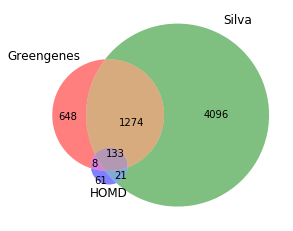

In [81]:
#Number positions: 1-Greengenes only, 2-Silva only, 3-Greengenes & Silva, 4-HOMD only, 5-Greengenes & HOMD
    #6-Silva & HOMD, 7-All three
venn3(subsets = (648, 4096, 1274, 61, 8, 21, 133), set_labels = ('Greengenes', 'Silva', 'HOMD'), alpha = 0.5);

### Final Intepretation and Future Directions

Silva is the largest database by far, and has 6,334 unique genera in the Silva dataset. There are 2,063 unique general in the Greengenes dataset, and 223 unique values in the HOMD dataset. The HOMD dataset is much smaller because it only focuses on bacteria that have been characterized in the oral microbiome, as compared to bacteria across all body sites. When grouping unique genera by phylum, Proteobacteria and Firmicutes genera were highly represented across all datasets, despite the large difference in number of genera present. There is a big discrepency in the number of Cyanobacteria classified in Silva (1416) versus Greengenes (89) which is an interesting observation and may be driving some differences between the datasets. Importantly, there an overlap of 1,274 genera between the two largest datasets (Silva and Greengenes). There is overlap between HOMD and Silva, where over 50 percent of the HOMD genera are shared with Silva and 69 genera are unique to HOMD. 

Future directions will be to develop machine learning models to try and predict if different sequencing platforms (I.e. Ion Torrent versus Illumina) or analysis pipelines (i.e. QIIME2 versus USEARCH) are more accurately classified, based on the reference database, using mock bacterial community data.  